In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

## Reading dataset

In [14]:
dataset = pd.read_csv('dataset.csv')

In [15]:
dataset.head()

,state,image
0,open,"[178, 179, 181, 180, 175, 171, 170, 168, 162, ..."
1,open,"[67, 66, 65, 64, 62, 62, 61, 61, 60, 61, 61, 5..."
2,open,"[80, 84, 90, 94, 97, 100, 103, 107, 108, 112, ..."
3,open,"[83, 81, 80, 81, 82, 81, 79, 78, 79, 80, 81, 7..."
4,close,"[121, 126, 131, 136, 140, 144, 146, 146, 151, ..."


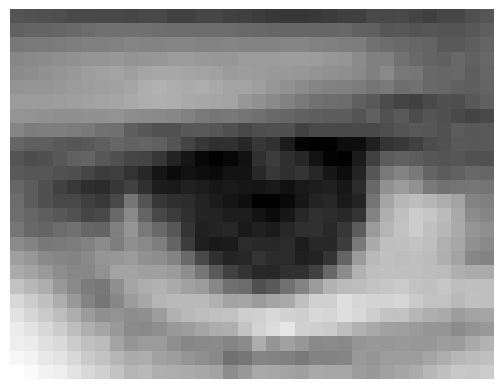

In [29]:
plt.axis('off')
plt.imshow(images[1].reshape(26,34).astype('float'), cmap='gray')

In [25]:
from PIL import Image
Image.fromarray(images[1].reshape(26,34).astype('float'))

ValueError: Could not save to PNG for display

<PIL.Image.Image image mode=F size=34x26>

## Dataset preprocessing

In [19]:
images = []
labels = []
image_shape = (26, 34, 1)
for index, (state, image) in dataset.iterrows():
    images.append(np.array(list(map(int, image[1:-1].split(',')))).reshape(image_shape))
    labels.append(int(state=='close'))
images = np.array(images)
labels = np.array(labels)

In [9]:
images[0]

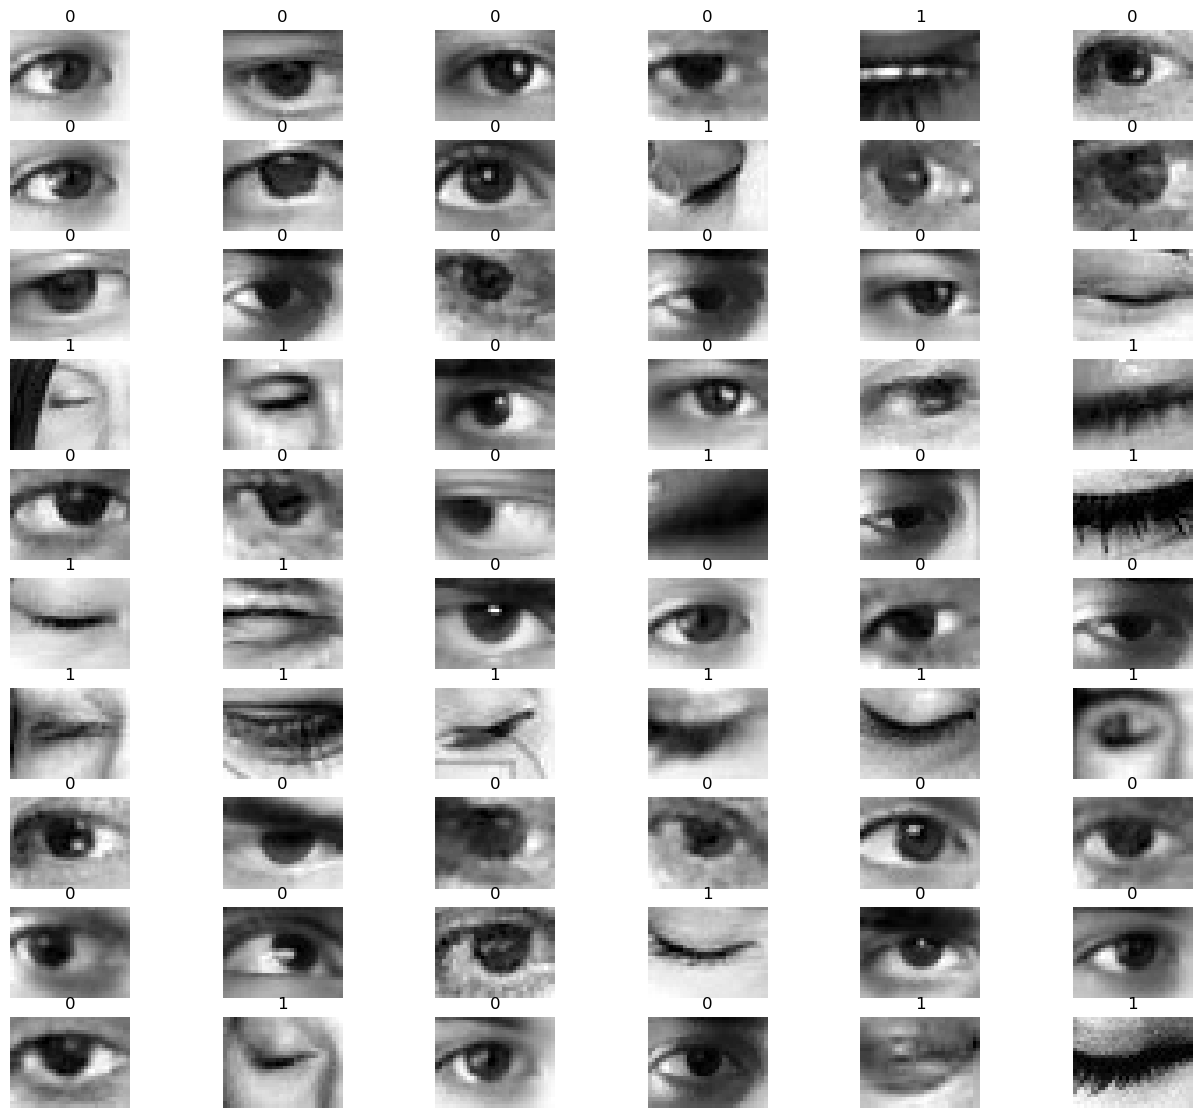

In [86]:
plt.figure(figsize=(16, 14))
rows = 10
columns = 6
for i in range(rows*columns):
    plt.subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title(str(labels[i]))
    plt.imshow(images[i], cmap='gray')

## Data Augmentation

In [105]:
def augment_image(image):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.image.random_contrast(image, lower=0.8, upper=1.2)
    return image

## Model design

In [134]:
model = models.Sequential([
    layers.Input(shape=image_shape),
    layers.Lambda(augment_image),
    layers.Conv2D(16, 4, activation='relu'),
    layers.Conv2D(16, 3, activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(8, 4, activation='relu'),
    layers.Conv2D(8, 3, activation='relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

In [135]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [136]:
early_stopper = callbacks.EarlyStopping(patience=5)
model_checkpoint = callbacks.ModelCheckpoint(os.sep.join(['blink_detector', '0001']), save_best_only=True)

In [137]:
history = model.fit(
    images, 
    labels, 
    batch_size=32, 
    epochs=40, 
    validation_split=0.2, 
    callbacks=[early_stopper, model_checkpoint]
)

Epoch 1/40


2023-07-21 17:04:31.985363: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


72/72 [==============================] - ETA: 0s - loss: 0.3129 - accuracy: 0.8808

2023-07-21 17:04:33.580232: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: blink_detector/0001/assets


INFO:tensorflow:Assets written to: blink_detector/0001/assets


72/72 [==============================] - 3s 30ms/step - loss: 0.3129 - accuracy: 0.8808 - val_loss: 0.1965 - val_accuracy: 0.9252
Epoch 2/40
72/72 [==============================] - ETA: 0s - loss: 0.1881 - accuracy: 0.9400

INFO:tensorflow:Assets written to: blink_detector/0001/assets


INFO:tensorflow:Assets written to: blink_detector/0001/assets


72/72 [==============================] - 2s 21ms/step - loss: 0.1881 - accuracy: 0.9400 - val_loss: 0.1572 - val_accuracy: 0.9461
Epoch 3/40
71/72 [============================>.] - ETA: 0s - loss: 0.1650 - accuracy: 0.9463

INFO:tensorflow:Assets written to: blink_detector/0001/assets


INFO:tensorflow:Assets written to: blink_detector/0001/assets


72/72 [==============================] - 1s 20ms/step - loss: 0.1648 - accuracy: 0.9461 - val_loss: 0.1243 - val_accuracy: 0.9548
Epoch 4/40
72/72 [==============================] - ETA: 0s - loss: 0.1406 - accuracy: 0.9574

INFO:tensorflow:Assets written to: blink_detector/0001/assets


INFO:tensorflow:Assets written to: blink_detector/0001/assets


72/72 [==============================] - 1s 20ms/step - loss: 0.1406 - accuracy: 0.9574 - val_loss: 0.1119 - val_accuracy: 0.9565
Epoch 5/40
72/72 [==============================] - 1s 14ms/step - loss: 0.1158 - accuracy: 0.9691 - val_loss: 0.1159 - val_accuracy: 0.9530
Epoch 6/40
72/72 [==============================] - ETA: 0s - loss: 0.1438 - accuracy: 0.9578

INFO:tensorflow:Assets written to: blink_detector/0001/assets


INFO:tensorflow:Assets written to: blink_detector/0001/assets


72/72 [==============================] - 2s 21ms/step - loss: 0.1438 - accuracy: 0.9578 - val_loss: 0.1004 - val_accuracy: 0.9739
Epoch 7/40
72/72 [==============================] - ETA: 0s - loss: 0.1224 - accuracy: 0.9643

INFO:tensorflow:Assets written to: blink_detector/0001/assets


INFO:tensorflow:Assets written to: blink_detector/0001/assets


72/72 [==============================] - 2s 21ms/step - loss: 0.1224 - accuracy: 0.9643 - val_loss: 0.0997 - val_accuracy: 0.9635
Epoch 8/40
72/72 [==============================] - ETA: 0s - loss: 0.1164 - accuracy: 0.9643

INFO:tensorflow:Assets written to: blink_detector/0001/assets


INFO:tensorflow:Assets written to: blink_detector/0001/assets


72/72 [==============================] - 1s 20ms/step - loss: 0.1164 - accuracy: 0.9643 - val_loss: 0.0915 - val_accuracy: 0.9722
Epoch 9/40
71/72 [============================>.] - ETA: 0s - loss: 0.1032 - accuracy: 0.9705

INFO:tensorflow:Assets written to: blink_detector/0001/assets


INFO:tensorflow:Assets written to: blink_detector/0001/assets


72/72 [==============================] - 2s 23ms/step - loss: 0.1071 - accuracy: 0.9700 - val_loss: 0.0727 - val_accuracy: 0.9722
Epoch 10/40
72/72 [==============================] - 1s 14ms/step - loss: 0.1058 - accuracy: 0.9661 - val_loss: 0.0930 - val_accuracy: 0.9757
Epoch 11/40
72/72 [==============================] - 1s 14ms/step - loss: 0.1005 - accuracy: 0.9704 - val_loss: 0.0863 - val_accuracy: 0.9757
Epoch 12/40
72/72 [==============================] - 1s 15ms/step - loss: 0.0989 - accuracy: 0.9691 - val_loss: 0.1032 - val_accuracy: 0.9704
Epoch 13/40
69/72 [===========================>..] - ETA: 0s - loss: 0.0791 - accuracy: 0.9774

INFO:tensorflow:Assets written to: blink_detector/0001/assets


INFO:tensorflow:Assets written to: blink_detector/0001/assets


72/72 [==============================] - 1s 20ms/step - loss: 0.0798 - accuracy: 0.9769 - val_loss: 0.0654 - val_accuracy: 0.9843
Epoch 14/40
72/72 [==============================] - 1s 14ms/step - loss: 0.0865 - accuracy: 0.9778 - val_loss: 0.0655 - val_accuracy: 0.9809
Epoch 15/40
72/72 [==============================] - 1s 14ms/step - loss: 0.0710 - accuracy: 0.9756 - val_loss: 0.1003 - val_accuracy: 0.9687
Epoch 16/40
71/72 [============================>.] - ETA: 0s - loss: 0.0812 - accuracy: 0.9767

INFO:tensorflow:Assets written to: blink_detector/0001/assets


INFO:tensorflow:Assets written to: blink_detector/0001/assets


72/72 [==============================] - 1s 21ms/step - loss: 0.0807 - accuracy: 0.9769 - val_loss: 0.0605 - val_accuracy: 0.9826
Epoch 17/40
72/72 [==============================] - 1s 13ms/step - loss: 0.0717 - accuracy: 0.9778 - val_loss: 0.0654 - val_accuracy: 0.9826
Epoch 18/40
72/72 [==============================] - 1s 14ms/step - loss: 0.0576 - accuracy: 0.9835 - val_loss: 0.0849 - val_accuracy: 0.9739
Epoch 19/40
72/72 [==============================] - 1s 14ms/step - loss: 0.0705 - accuracy: 0.9796 - val_loss: 0.0852 - val_accuracy: 0.9809
Epoch 20/40
72/72 [==============================] - 1s 13ms/step - loss: 0.0599 - accuracy: 0.9804 - val_loss: 0.0748 - val_accuracy: 0.9791
Epoch 21/40
71/72 [============================>.] - ETA: 0s - loss: 0.0632 - accuracy: 0.9815

INFO:tensorflow:Assets written to: blink_detector/0001/assets


INFO:tensorflow:Assets written to: blink_detector/0001/assets


72/72 [==============================] - 1s 19ms/step - loss: 0.0625 - accuracy: 0.9817 - val_loss: 0.0538 - val_accuracy: 0.9843
Epoch 22/40
72/72 [==============================] - 1s 13ms/step - loss: 0.0657 - accuracy: 0.9800 - val_loss: 0.0772 - val_accuracy: 0.9774
Epoch 23/40
72/72 [==============================] - 1s 14ms/step - loss: 0.0686 - accuracy: 0.9783 - val_loss: 0.0564 - val_accuracy: 0.9861
Epoch 24/40
72/72 [==============================] - 1s 13ms/step - loss: 0.0457 - accuracy: 0.9861 - val_loss: 0.0799 - val_accuracy: 0.9722
Epoch 25/40
72/72 [==============================] - 1s 14ms/step - loss: 0.0328 - accuracy: 0.9900 - val_loss: 0.0690 - val_accuracy: 0.9826
Epoch 26/40
72/72 [==============================] - 1s 13ms/step - loss: 0.0579 - accuracy: 0.9813 - val_loss: 0.0797 - val_accuracy: 0.9670


<Axes: >

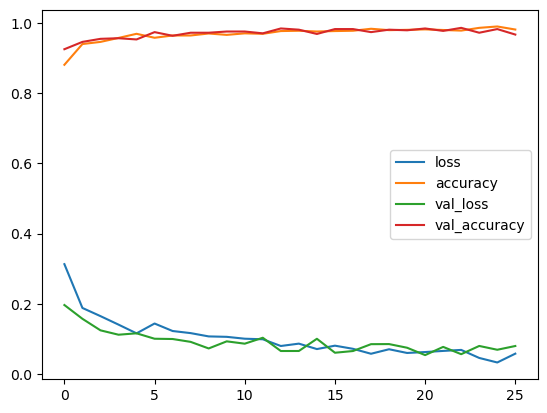

In [140]:
pd.DataFrame(history.history).plot()

## Serve the model

In [ ]:
qq